# Preprocesamiento de los datos

In [1]:
from dotenv import load_dotenv
import os

# Cargar automáticamente las variables del archivo .env
load_dotenv()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_RAW = os.getenv('DATA_RAW')
DATA_PREPROCESSED = os.getenv('DATA_PROCESSED')

In [2]:
df = pd.read_csv(os.path.join('..',DATA_RAW, "dataframe_merged.csv"), sep=";")

In [3]:
df

,Ajuste Fecha,Dia Semana,Sabor 1,Sabor 2,Sabor 3,Sabor 4,Sabor 5,Sabor 6,Sabor 7,Sabor 8,...,humidity,wind_speed,wind_deg,wind_gust,rain_1h,clouds_all,weather_main,weather_description,weather_icon,Total Cantidad Kilos
0,2022-01-01,Lunes,5.36,12.45,5.47,5.03,NaN,12.41,11.60,5.60,...,64.0,3.270,86.0,4.47,0.51,40.0,Clouds,sky is clear,01n,834.94
1,2022-01-02,Jueves,22.92,NaN,26.50,NaN,NaN,32.50,5.08,5.12,...,80.0,2.570,60.0,NaN,0.51,0.5,Clear,sky is clear,01d,1936.63
2,2022-01-03,Jueves,34.39,NaN,35.99,NaN,NaN,32.64,20.10,20.37,...,67.0,2.060,150.0,0.89,3.30,0.0,Clear,sky is clear,01d,2447.53
3,2022-01-04,Domingo,10.66,NaN,12.38,NaN,NaN,21.97,NaN,10.21,...,69.0,4.955,198.5,2.68,1.90,0.0,Clear,sky is clear,01d,868.08
4,2022-01-05,Martes,11.42,NaN,23.53,NaN,NaN,18.89,5.05,5.07,...,53.5,4.885,125.0,3.13,NaN,0.0,Clear,sky is clear,01d,1844.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2024-12-27,Domingo,16.74,5.08,24.01,NaN,NaN,22.17,10.09,10.67,...,58.5,2.150,70.0,0.00,NaN,0.0,Clear,sky is clear,01d,1803.89
1092,2024-12-28,Lunes,5.42,5.75,23.50,NaN,NaN,16.92,9.72,NaN,...,49.0,2.240,80.0,0.00,NaN,0.0,Clear,sky is clear,01d,1505.94
1093,2024-12-29,Martes,38.55,9.38,24.96,NaN,NaN,22.92,NaN,NaN,...,52.5,4.470,100.0,0.00,NaN,0.0,Clear,sky is clear,01d,3293.78
1094,2024-12-30,Miércoles,48.28,5.37,16.71,NaN,NaN,23.98,34.76,10.16,...,59.5,4.920,75.0,0.00,NaN,0.0,Clear,sky is clear,01d,4478.46


In [4]:
df['Ajuste Fecha'] = pd.to_datetime(df['Ajuste Fecha'])
df['Dia Semana'] = df['Ajuste Fecha'].dt.day_name(locale = 'es_ES')

## Eliminar registros sin features

In [5]:
df = df[~df['dt_iso'].isna()]

In [6]:
# Eliminar dt_iso
df.drop(columns=['dt_iso'], inplace=True)

# Eliminar Total Cantidad Kilos\
df.drop(columns=['Total Cantidad Kilos'], inplace=True)

In [7]:
df.drop('Unnamed: 81', axis=1, inplace=True)

In [8]:
df.drop('Total Cantidad', axis = 1, inplace=True)

## División del conjunto de datos

In [9]:
# Ordenar por fecha
df = df.sort_values(by='Ajuste Fecha')

In [10]:
sabores = [f'Sabor {i}' for i in range(1,80)]

X = df.drop(columns=sabores)
y = df[sabores]

In [11]:
# Reservamos los últimos 14 días para test
# En Train
X_train = X[:-14]
y_train = y[:-14]

# En test
X_test = X[-14:]
y_test = y[-14:]

## Preprocesado

In [12]:
# Varriables numericas
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Variables categóricas
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

In [13]:
# Eliminar columna fehca
X_train.drop(columns=['Ajuste Fecha'], inplace=True)

C:\Users\IA-41\AppData\Local\Temp\ipykernel_24800\1042754550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['Ajuste Fecha'], inplace=True)


### Pipeline

In [14]:
import sys
import os

# Agregar la raíz del proyecto al path de Python
sys.path.append(os.path.abspath('..'))


In [15]:
categorical_features

['Dia Semana', 'weather_main', 'weather_description', 'weather_icon']

In [16]:
from src.features.build_features import build_preprocessing_pipeline
from sklearn.pipeline import Pipeline

preprocessor = build_preprocessing_pipeline(X_train, categorical_features) # Definimos preprocesador
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_zero',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['rain_1h']),
                                                 ('num_mean',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['temp', 'dew_point',
                                                   'feels_like', 'temp_min',
                                                   'temp_max', 'pressure',
                                                   'humidity', 'wind_speed',
                                                   'wind_deg', 'wind_gust',
                                                   'clouds_all']),
                                                 ('cat_mode',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Dia Semana', 'weather_main',
                                                   'weather_description',
                                                   'weather_icon'])],
                                   verbose_feature_names_out=False))])

In [17]:
# Obtener nombres de columnas
column_names = preprocessor.get_feature_names_out()

In [19]:
# Guardar pipeline
#import joblib
#joblib.dump(pipeline, os.path.join('..','src\\features', 'pipeline.pkl'))

['..\\src\\features\\pipeline.pkl']

In [20]:
# Importar el pipeline guardado
import joblib
pipeline = joblib.load(os.path.join('..','src\\features', 'pipeline.pkl'))

# Tranformar X_train
X_train_transformado = pipeline.transform(X_train)

In [21]:
X_train_transformado

array([[ 2.04      ,  0.74675516,  0.68493608, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.04      ,  0.74742212,  0.90675052, ...,  0.        ,
         0.        ,  0.        ],
       [13.2       ,  0.99579896,  0.95764814, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.52733586,  0.18024249, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.28689507,  0.1388244 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.46294633,  0.13727008, ...,  0.        ,
         0.        ,  0.        ]])

In [22]:
pd.DataFrame(X_train_transformado, columns=column_names).columns

Index(['rain_1h', 'temp', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust',
       'clouds_all', 'Dia Semana_Domingo', 'Dia Semana_Jueves',
       'Dia Semana_Lunes', 'Dia Semana_Martes', 'Dia Semana_Miércoles',
       'Dia Semana_Sábado', 'Dia Semana_Viernes', 'weather_main_Clear',
       'weather_main_Clouds', 'weather_main_Drizzle', 'weather_main_Mist',
       'weather_main_Rain', 'weather_description_broken clouds',
       'weather_description_few clouds', 'weather_description_fog',
       'weather_description_heavy intensity rain',
       'weather_description_light intensity drizzle',
       'weather_description_light rain', 'weather_description_mist',
       'weather_description_moderate rain',
       'weather_description_overcast clouds',
       'weather_description_scattered clouds',
       'weather_description_sky is clear',
       'weather_description_thunderstorm with light rain',
       'weather_descript

### Visualización de la distribución de las variables

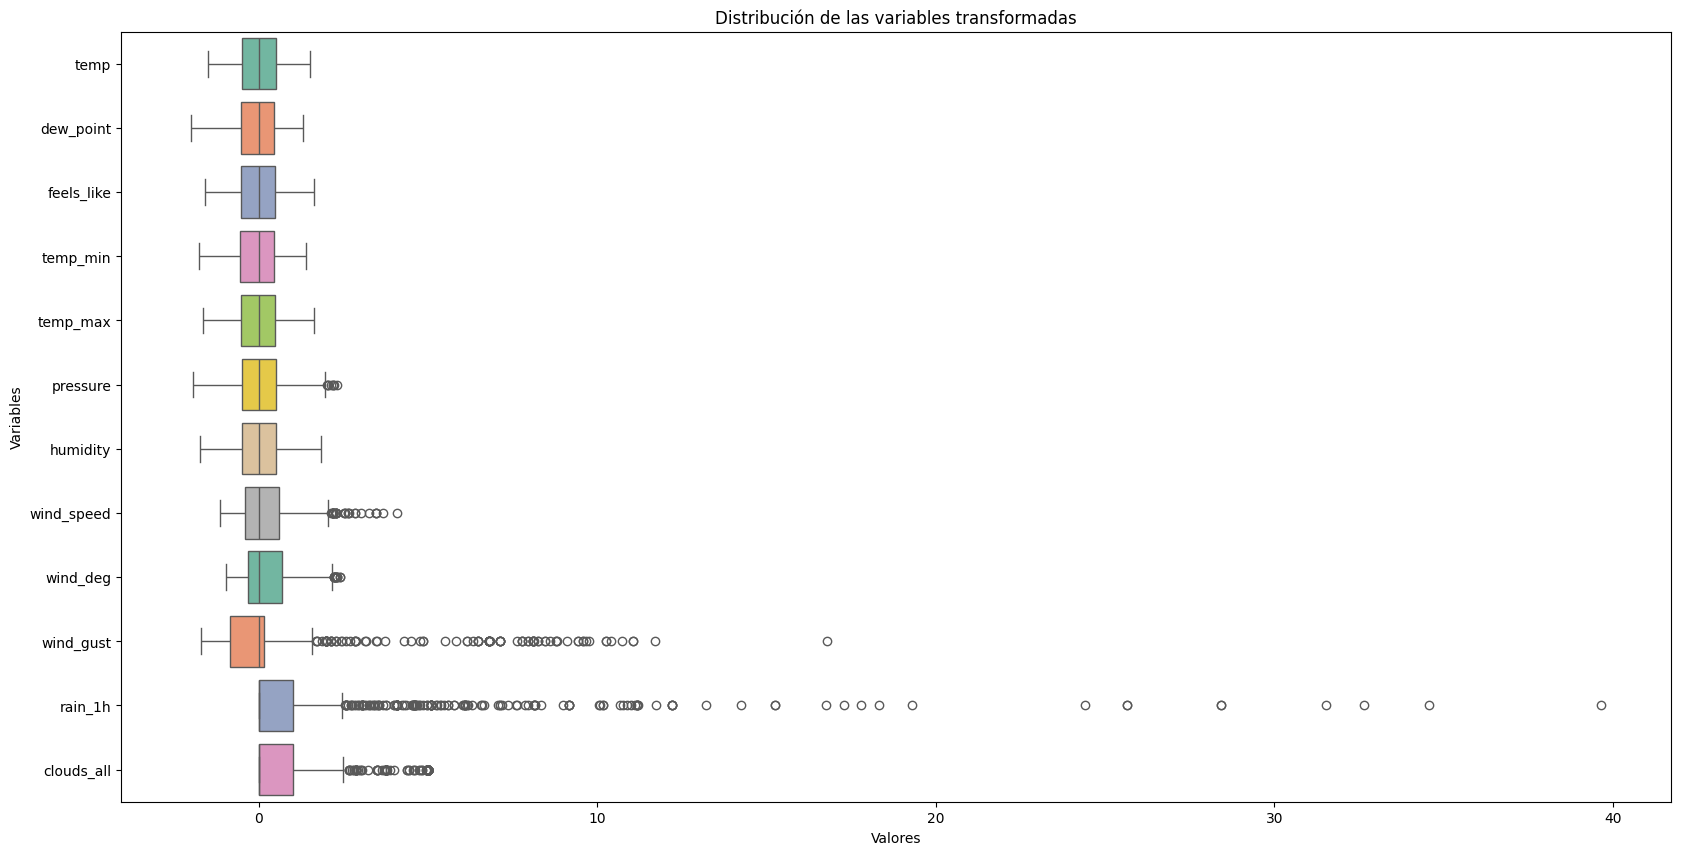

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con los datos transformados
df_transformed = pd.DataFrame(X_train_transformado, columns=column_names)

# Generar el gráfico de boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_transformed[numerical_features], orient='h', palette='Set2')
plt.title('Distribución de las variables transformadas')
plt.xlabel('Valores')
plt.ylabel('Variables')
plt.show()

# Valores nulos variable objetivo

In [27]:
y_train.fillna(0, inplace = True)
y_train

C:\Users\IA-41\AppData\Local\Temp\ipykernel_24800\3416577688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.fillna(0, inplace = True)


,Sabor 1,Sabor 2,Sabor 3,Sabor 4,Sabor 5,Sabor 6,Sabor 7,Sabor 8,Sabor 9,Sabor 10,...,Sabor 70,Sabor 71,Sabor 72,Sabor 73,Sabor 74,Sabor 75,Sabor 76,Sabor 77,Sabor 78,Sabor 79
0,5.36,12.45,5.47,5.03,0.0,12.41,11.60,5.60,6.22,11.21,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
1,22.92,0.00,26.50,0.00,0.0,32.50,5.08,5.12,0.00,25.26,...,0.00,1.07,0.00,37.09,43.60,0.00,20.0,50.0,28.03,11.63
2,34.39,0.00,35.99,0.00,0.0,32.64,20.10,20.37,0.00,49.79,...,0.00,3.17,3.29,30.47,37.01,0.00,20.0,50.0,25.95,10.61
3,10.66,0.00,12.38,0.00,0.0,21.97,0.00,10.21,0.00,22.96,...,0.00,0.00,1.02,11.89,11.54,0.00,10.0,10.0,11.30,5.59
4,11.42,0.00,23.53,0.00,0.0,18.89,5.05,5.07,0.00,26.02,...,0.00,1.04,3.06,18.13,25.47,0.00,60.0,70.0,12.66,11.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,0.00,4.84,11.84,0.00,0.0,12.42,10.54,5.32,12.12,20.33,...,2.03,2.07,1.01,16.56,7.19,18.77,30.0,30.0,6.73,5.71
1078,23.08,5.06,34.18,0.00,0.0,17.66,5.24,0.00,7.08,26.19,...,0.00,6.23,4.11,37.18,30.72,5.88,30.0,40.0,24.72,9.92
1079,26.91,0.00,28.62,0.00,0.0,27.48,15.79,10.64,13.20,32.82,...,2.03,4.14,4.08,48.65,26.85,13.30,60.0,40.0,18.78,10.12
1080,4.65,9.79,23.68,0.00,0.0,18.78,26.27,10.66,6.60,36.94,...,3.04,4.13,1.03,22.72,31.95,24.86,30.0,30.0,18.86,11.05


# Distribuciones de variables objetivos

Distribución de cada columna en y_train

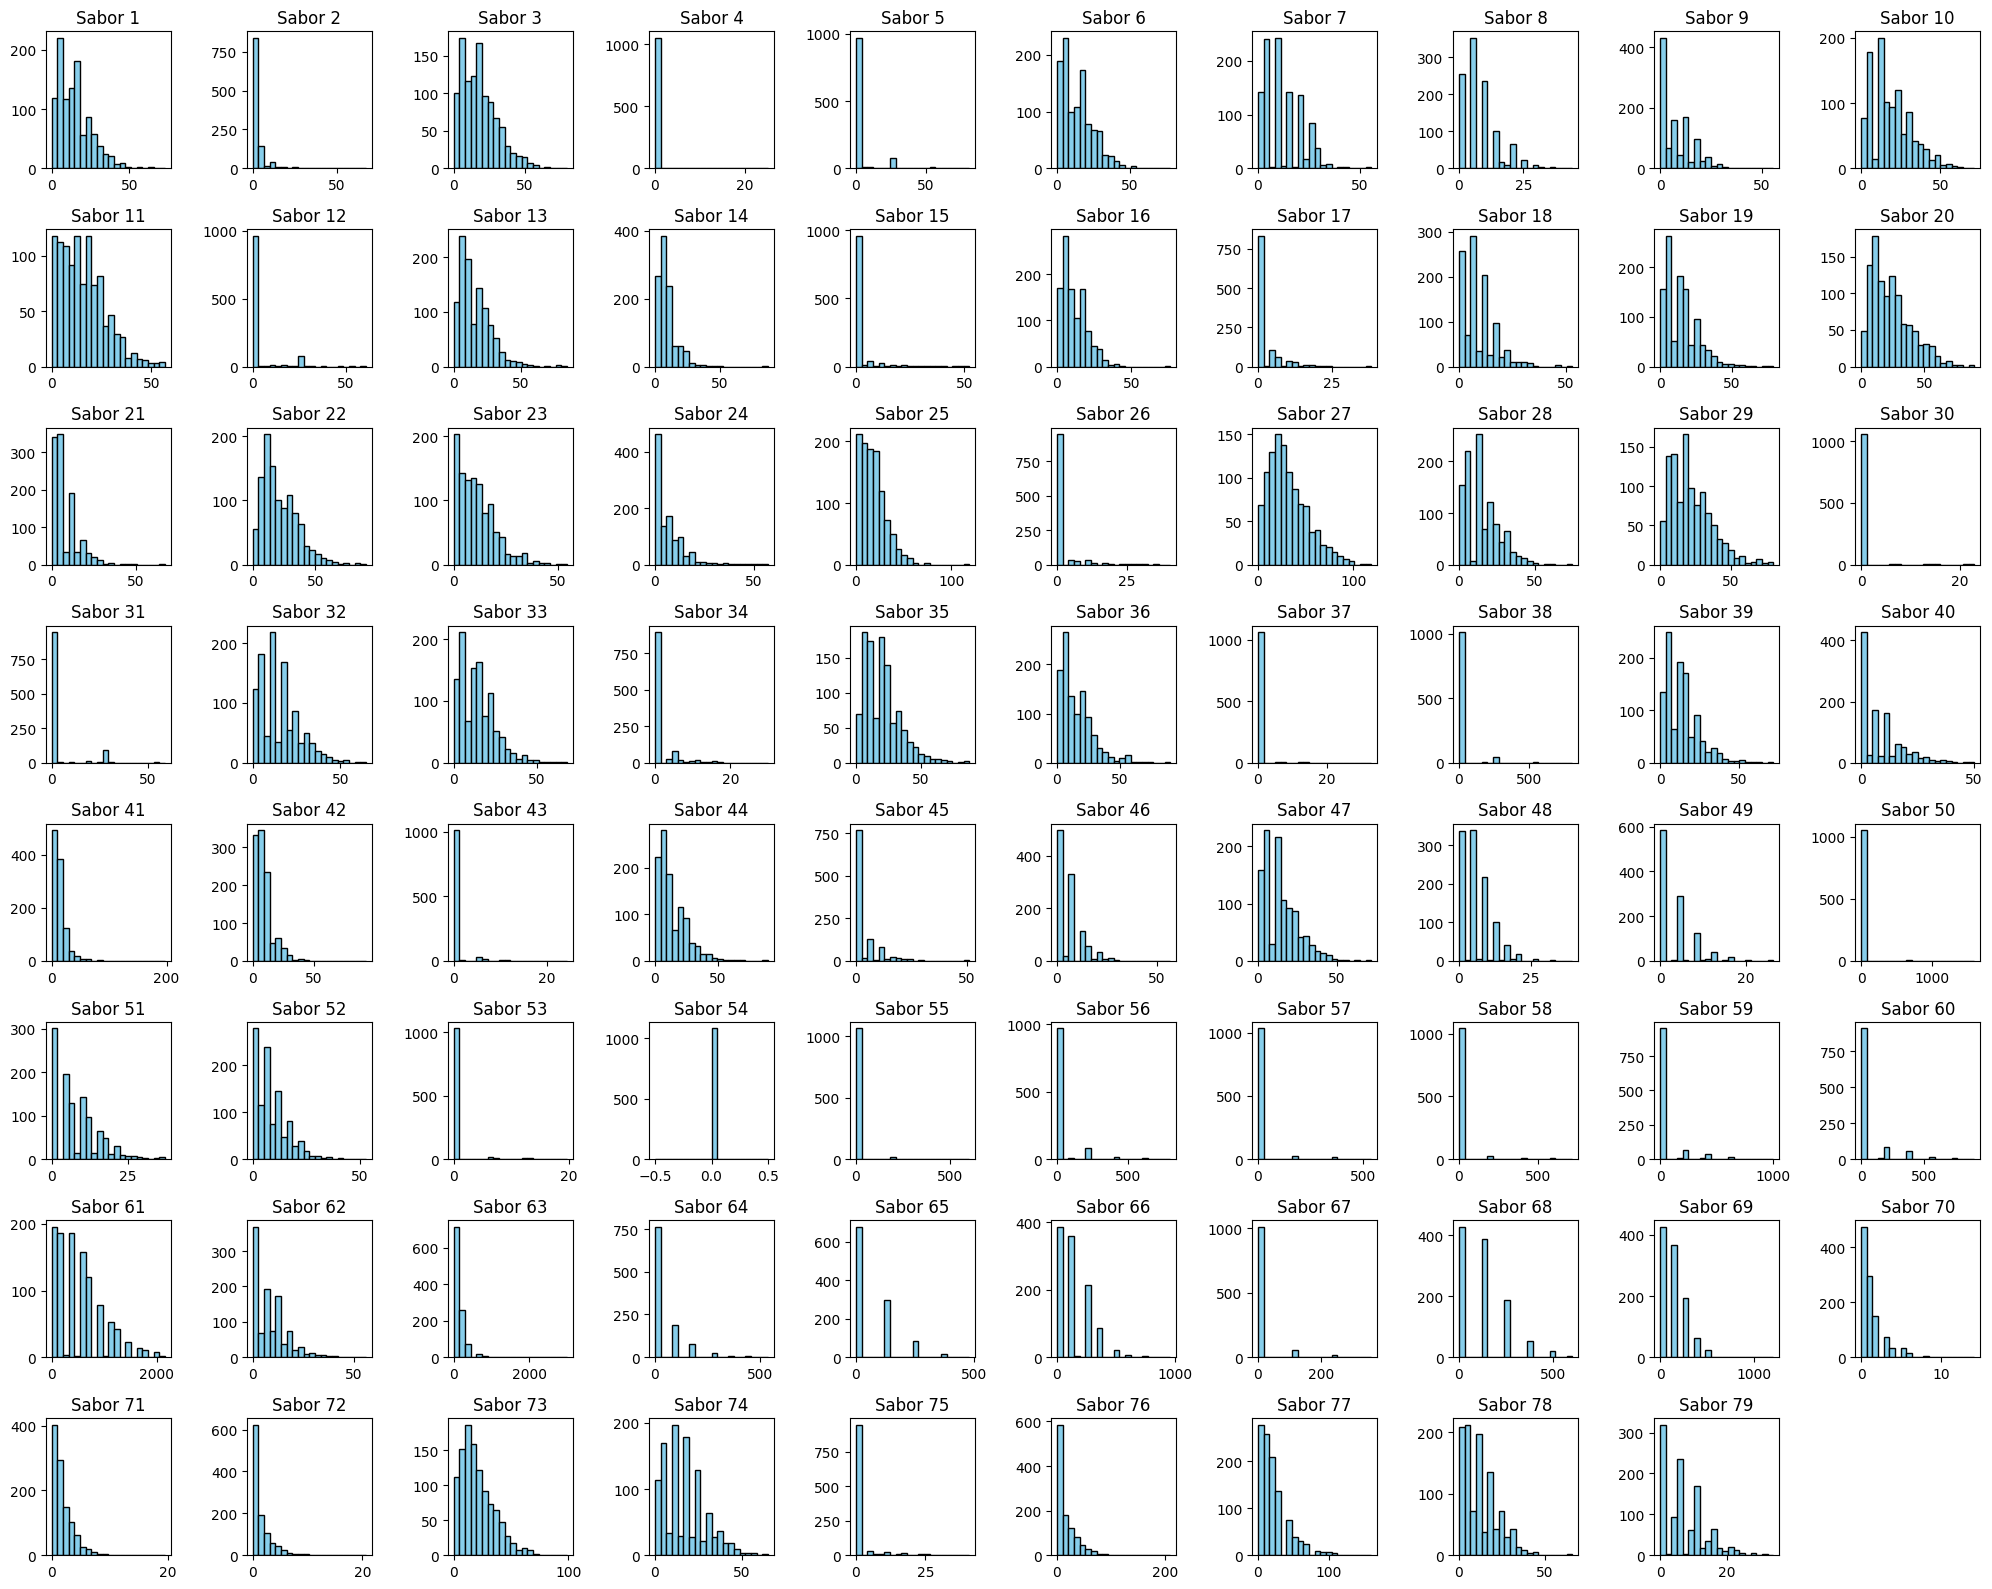

In [28]:
import matplotlib.pyplot as plt

# Configuración de subplots: 10 columnas x 8 filas
fig, axes = plt.subplots(8, 10, figsize=(20, 16))
axes = axes.flatten()

# Graficar cada columna de y_train
for i, column in enumerate(y_train.columns):
    ax = axes[i]
    y_train[column].plot(kind='hist', bins=20, ax=ax, title=column, color='skyblue', edgecolor='black')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Eliminar subplots vacíos
for j in range(len(y_train.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Guardar datos preprocesados

In [ ]:
df_train = X_train_transformado


## Agrupación de columnas similares en y_train

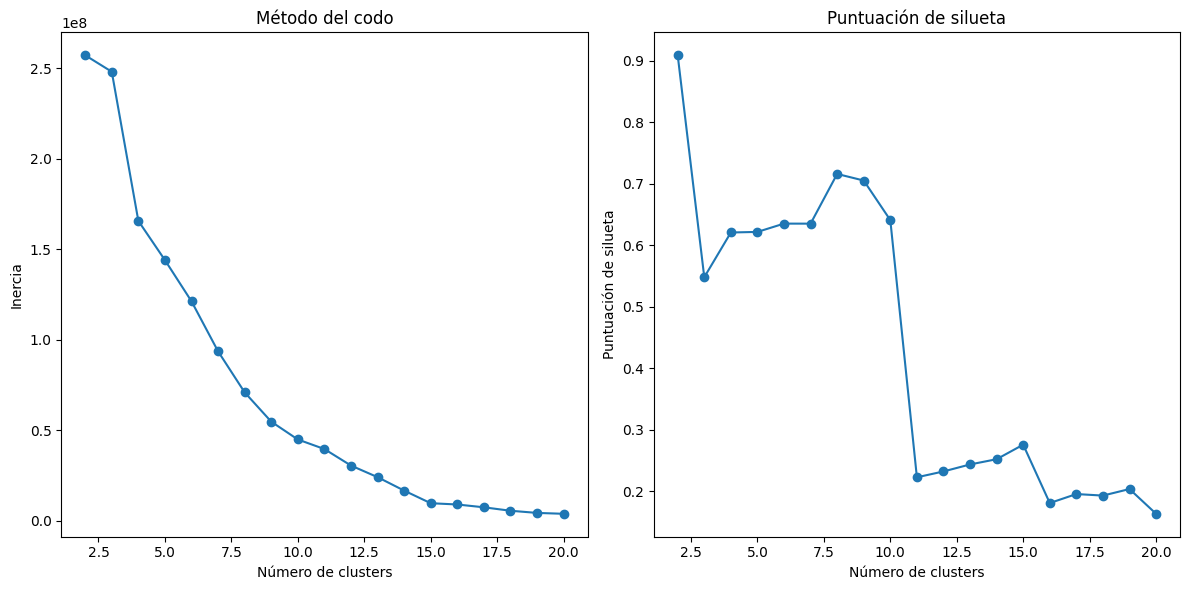

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Transponer y_train para agrupar columnas
y_train_transposed = y_train.T

# Determinar el número óptimo de clusters usando el método del codo
inertia = []
silhouette_scores = []
k_range = range(2, 21)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(y_train_transposed)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(y_train_transposed, kmeans.labels_))

# Graficar el método del codo y la puntuación de silueta
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Puntuación de silueta')
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación de silueta')
plt.tight_layout()
plt.show()

In [35]:
# Elegir el número óptimo de clusters basado en los gráficos
optimal_k = 10  # Cambiar según los resultados del análisis

# Agrupar columnas usando KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_train_clusters = kmeans.fit_predict(y_train_transposed)

# Crear un diccionario para almacenar las columnas agrupadas
clusters = {i: [] for i in range(optimal_k)}
for idx, label in enumerate(y_train_clusters):
    clusters[label].append(y_train.columns[idx])

# Mostrar las columnas agrupadas
for cluster, columns in clusters.items():
    print(f'Cluster {cluster}: {columns}')

Cluster 0: ['Sabor 1', 'Sabor 2', 'Sabor 3', 'Sabor 4', 'Sabor 5', 'Sabor 6', 'Sabor 7', 'Sabor 8', 'Sabor 9', 'Sabor 10', 'Sabor 11', 'Sabor 12', 'Sabor 13', 'Sabor 14', 'Sabor 15', 'Sabor 16', 'Sabor 17', 'Sabor 18', 'Sabor 19', 'Sabor 20', 'Sabor 21', 'Sabor 22', 'Sabor 23', 'Sabor 24', 'Sabor 25', 'Sabor 26', 'Sabor 27', 'Sabor 28', 'Sabor 29', 'Sabor 30', 'Sabor 31', 'Sabor 32', 'Sabor 33', 'Sabor 34', 'Sabor 35', 'Sabor 36', 'Sabor 37', 'Sabor 39', 'Sabor 40', 'Sabor 41', 'Sabor 42', 'Sabor 43', 'Sabor 44', 'Sabor 45', 'Sabor 46', 'Sabor 47', 'Sabor 48', 'Sabor 49', 'Sabor 51', 'Sabor 52', 'Sabor 53', 'Sabor 54', 'Sabor 55', 'Sabor 62', 'Sabor 67', 'Sabor 70', 'Sabor 71', 'Sabor 72', 'Sabor 73', 'Sabor 74', 'Sabor 75', 'Sabor 76', 'Sabor 77', 'Sabor 78', 'Sabor 79']
Cluster 1: ['Sabor 61']
Cluster 2: ['Sabor 68']
Cluster 3: ['Sabor 66']
Cluster 4: ['Sabor 50']
Cluster 5: ['Sabor 63']
Cluster 6: ['Sabor 60']
Cluster 7: ['Sabor 69']
Cluster 8: ['Sabor 59']
Cluster 9: ['Sabor 38', '

In [52]:
prueba = y_train[clusters[0]].copy()  # Crear una copia para evitar modificar el original

for i, sabor in enumerate(clusters[0]):
    prueba[sabor] = prueba[sabor].apply(lambda x: i if x != 0 else None)


### Gráfico de evolución de sabores

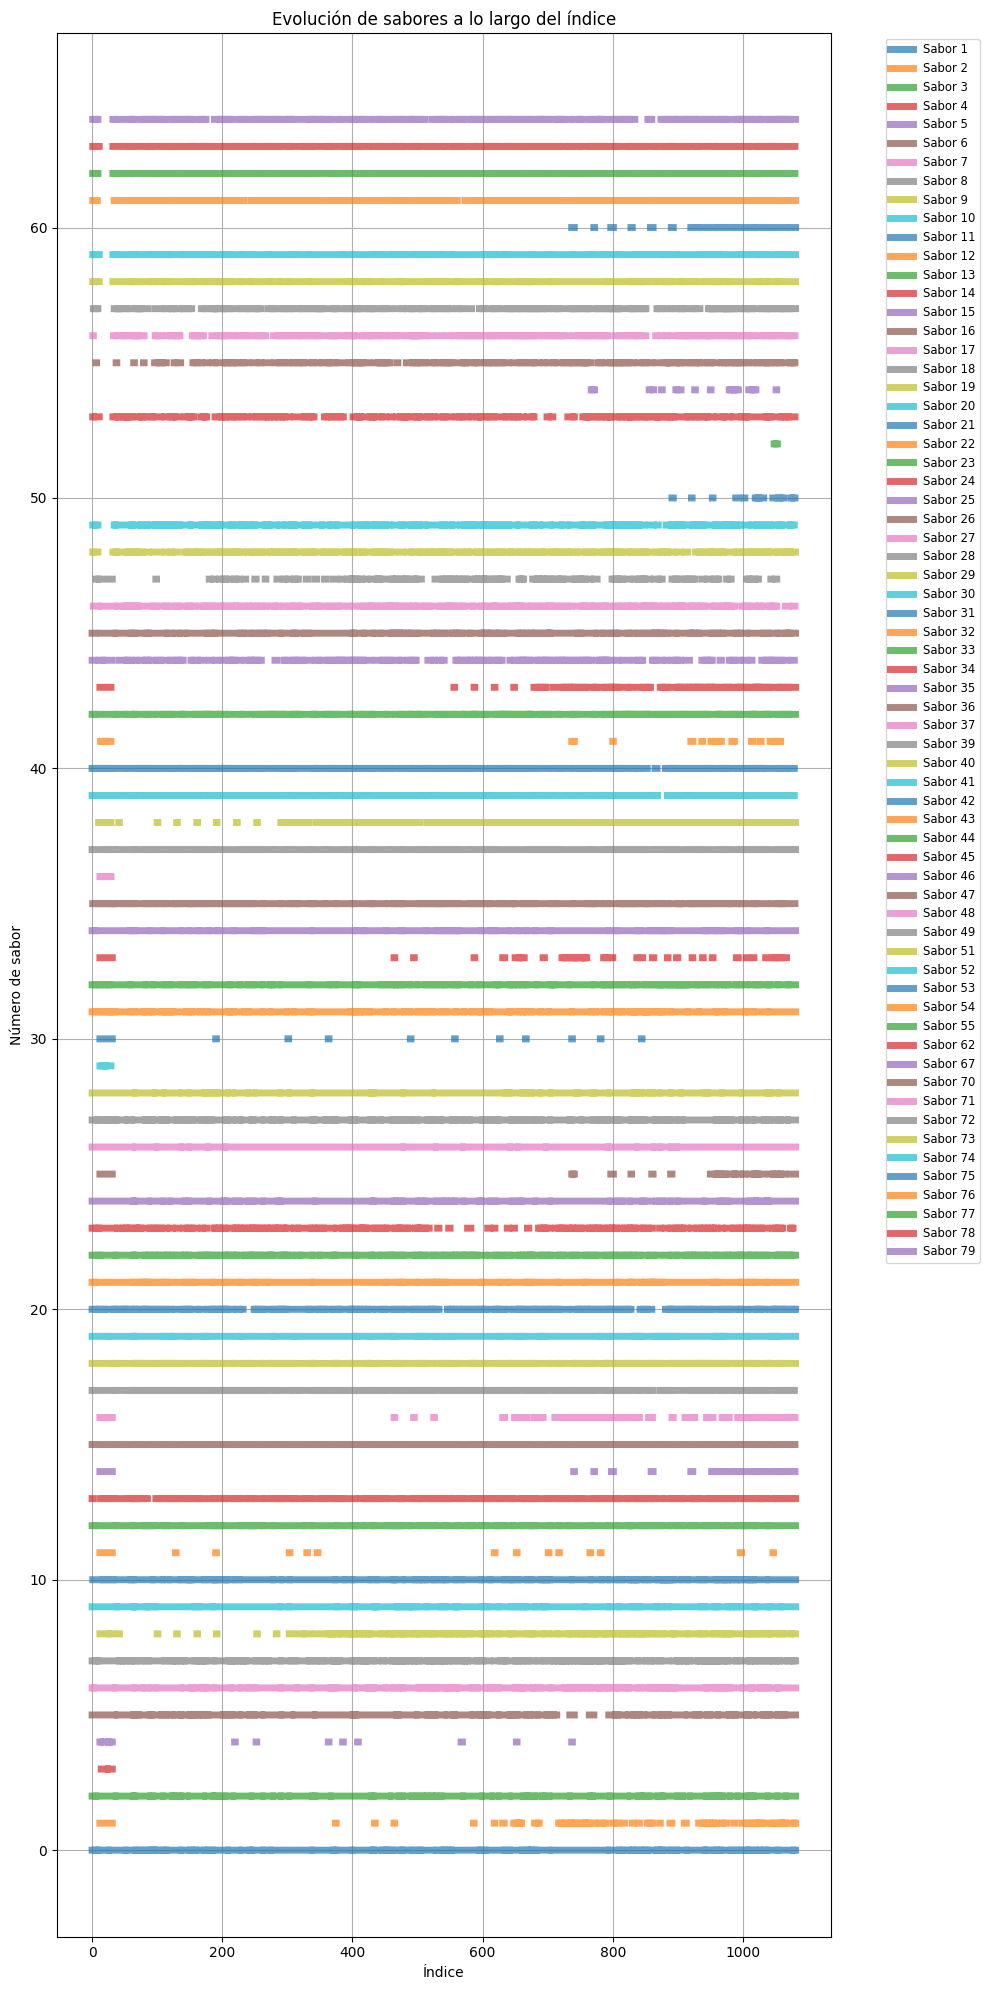

In [62]:
import matplotlib.pyplot as plt

# Crear un gráfico de líneas para la evolución de cada sabor
plt.figure(figsize=(10, 20))
for sabor in prueba.columns:
    plt.plot(prueba.index, prueba[sabor], label=sabor, alpha=0.7, linewidth = 5)

plt.title('Evolución de sabores a lo largo del índice')
plt.xlabel('Índice')
plt.ylabel('Número de sabor')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), ncol=1, fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()